# 🧠 Deep Learning Essentials: Understanding Softmax and Cross-Entropy in CNNs

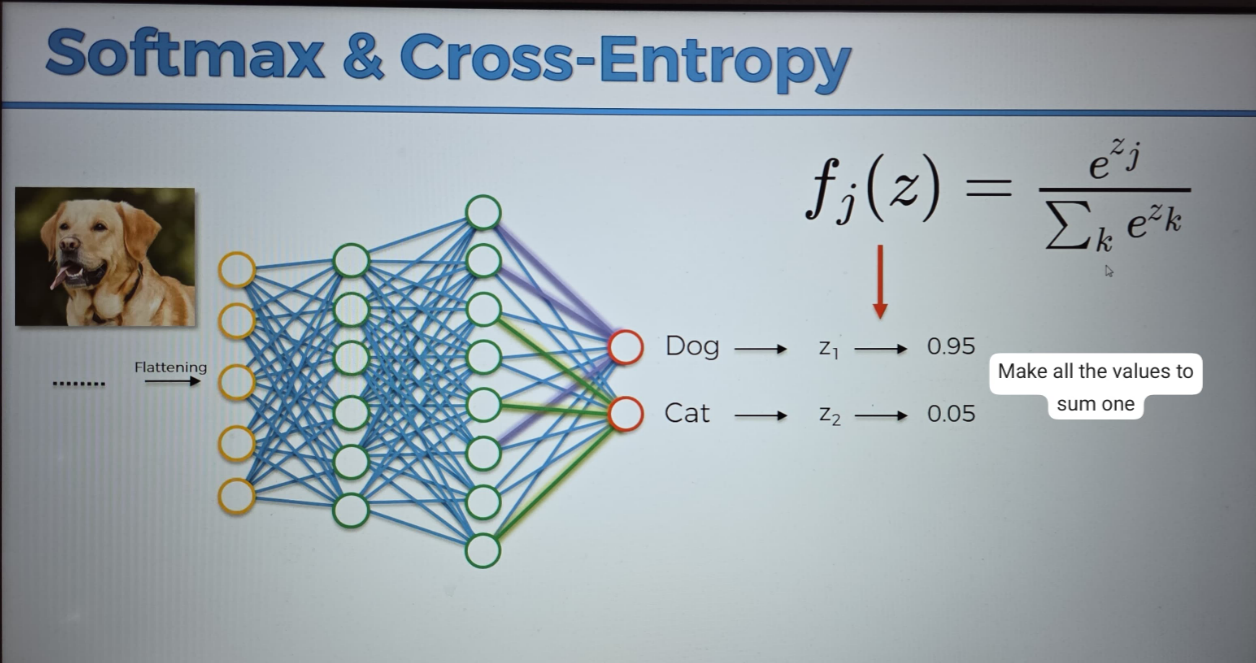

## 📌 Introduction

This tutorial explains two core components in classification-based deep learning tasks:

* The **Softmax** function: Converts raw scores (logits) into probabilities.
* The **Cross-Entropy** loss: Measures how well the predicted probabilities match the actual labels.

---

## 🔢 Softmax Function in CNNs

### 📍 What It Does:

Softmax transforms raw output values (logits) into probabilities that sum to 1.

### 📘 Formula:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

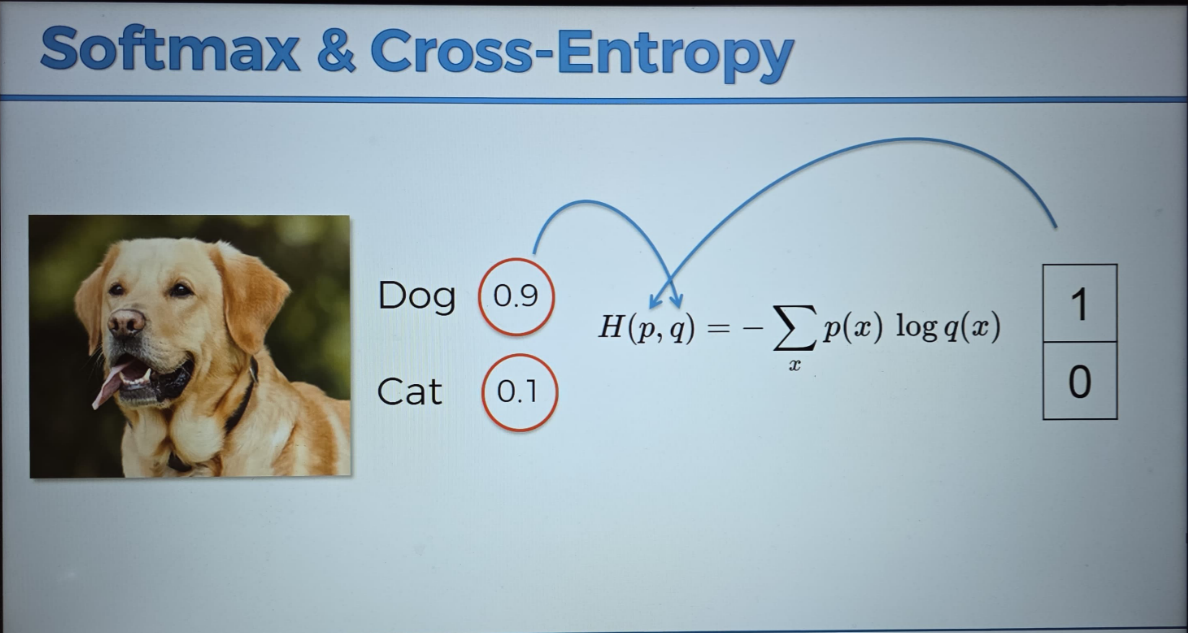

### 📍 Why It’s Important:

Without softmax, each neuron could output any value. Softmax ensures outputs behave like **probabilities**, which is crucial for classification tasks.

### ✅ Example:

Let’s say a CNN outputs the raw scores (logits) `[2.0, 1.0, 0.1]`. We apply softmax:

```python
import numpy as np

def softmax(logits):
    exps = np.exp(logits - np.max(logits))  # for numerical stability
    return exps / np.sum(exps)

logits = np.array([2.0, 1.0, 0.1])
probabilities = softmax(logits)

print("Softmax Probabilities:", probabilities)
```

**Output:**

```
Softmax Probabilities: [0.65900114 0.24243297 0.09856589]
```

---

## 🧮 Cross-Entropy Loss

### 📍 What It Does:

Measures how different the predicted probabilities are from the actual (true) class.

### 📘 Formula:

$$
L = -\sum_i p_i \log(q_i)
$$

* $p_i$: True label (1 for correct class, 0 otherwise)
* $q_i$: Predicted probability from softmax

### ✅ Simple Example:

Assume:

* Predicted probs = `[0.7, 0.2, 0.1]`
* True class is the **first** class → `[1, 0, 0]` (one-hot)

```python
def cross_entropy(predicted, actual):
    return -np.sum(actual * np.log(predicted + 1e-15))  # added epsilon for numerical stability

predicted = np.array([0.7, 0.2, 0.1])
actual = np.array([1, 0, 0])

loss = cross_entropy(predicted, actual)
print("Cross-Entropy Loss:", loss)
```

**Output:**

```
Cross-Entropy Loss: 0.35667494393873245
```

---

## 📊 Comparison of Models (Example)

| Image | NN1 Prediction   | NN2 Prediction   | True Label |
| ----- | ---------------- | ---------------- | ---------- |
| 1     | 90% dog, 10% cat | 60% dog, 40% cat | Dog        |
| 2     | 10% dog, 90% cat | 30% dog, 70% cat | Cat        |
| 3     | 40% dog, 60% cat | 10% dog, 90% cat | Dog        |

### 📈 Performance Metrics:

| Metric               | NN1  | NN2  |
| -------------------- | ---- | ---- |
| Classification Error | 33%  | 33%  |
| MSE                  | 25%  | 71%  |
| Cross-Entropy Loss   | 0.38 | 1.06 |

---

## 🧠 Why Cross-Entropy is Better Than MSE

| Criterion                            | Mean Squared Error | Cross-Entropy |
| ------------------------------------ | ------------------ | ------------- |
| Low gradients early in training      | ✅ Yes              | ❌ No          |
| Stronger feedback on bad predictions | ❌ No               | ✅ Yes         |
| Captures confidence in prediction    | ❌ No               | ✅ Yes         |
| Faster convergence                   | ❌ Slower           | ✅ Faster      |

---

## ✅ Key Takeaways

* **Softmax** turns raw scores into probabilities for classification.
* **Cross-Entropy** measures the quality of predicted probabilities.
* Always use **softmax + cross-entropy** in classification CNNs.
* Provides **better gradients**, **better convergence**, and **more accurate training**.

---

## 📚 Additional Resources

* 📘 "A Friendly Introduction to Cross-Entropy" by Rob DiPietro
* 🧾 PyTorch: `nn.CrossEntropyLoss`
* 🧾 TensorFlow: `tf.nn.softmax_cross_entropy_with_logits`

